
# Prevendo a Popularidade de Músicas no Spotify
## 1. Limpeza e Tratamento de Dados

In [2]:
import pandas as pnd
import numpy as np

# Carrega os dados
train_df = pnd.read_csv("train.csv")

# Exibe informações gerais dos dados e valores nulos
train_df.info()
train_df.describe()
null_values = train_df.isnull().sum()
null_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


### Análise Inicial dos Dados

A primeira etapa do processo de limpeza envolve entender a estrutura do dataset, verificar a existência de valores nulos e observar estatísticas descritivas básicas.

- **Valores Nulos**: Identificação da presença ou ausência de valores nulos nas colunas.
- **Outliers**: Através das estatísticas descritivas (mínimo, máximo, média, etc.), podem-se ter uma ideia inicial de onde os outliers podem estar localizados.


In [3]:
# Limpa outliers com base na análise descritiva e nos domínios das variáveis
filtered_train_df = train_df[
    (train_df['duration_ms'] >= 30000) & (train_df['duration_ms'] <= 600000) &  
    (train_df['loudness'] >= -30) & (train_df['loudness'] <= 0) &               
    (train_df['instrumentalness'] <= 0.95)                                      
]
filtered_train_df.describe()


,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000,77927.000000
mean,57200.996330,224954.103032,0.572524,0.648616,5.315334,-7.974603,0.637391,0.085089,0.306903,0.142294,0.213255,0.480411,122.449074,3.909441,0.490215
std,32908.263937,79270.453669,0.168758,0.244296,3.564286,4.428529,0.480756,0.105804,0.326627,0.294355,0.189301,0.256499,29.647137,0.412163,0.499907
min,0.000000,30080.000000,0.000000,0.000019,0.000000,-29.966000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28723.000000,175146.000000,0.463000,0.481000,2.000000,-9.786000,0.000000,0.035800,0.016500,0.000000,0.097900,0.270000,99.825500,4.000000,0.000000
50%,57286.000000,212893.000000,0.584000,0.690000,5.000000,-6.934000,1.000000,0.049100,0.162000,0.000033,0.132000,0.471000,122.047000,4.000000,0.000000
75%,85769.500000,260696.000000,0.697000,0.855000,8.000000,-4.960000,1.000000,0.085100,0.579000,0.030450,0.274000,0.687000,140.090000,4.000000,1.000000
max,113998.000000,599999.000000,0.985000,1.000000,11.000000,-0.001000,1.000000,0.965000,0.996000,0.950000,1.000000,0.995000,222.605000,5.000000,1.000000



### Limpeza dos Dados

- **Duração das faixas**: Faixas com menos de 30 segundos ou mais de 10 minutos foram removidas.
- **Nível de Loudness**: Removemos faixas com valores de `loudness` fora do intervalo típico de -30 dB a 0 dB.
- **Instrumentalidade**: Faixas com `instrumentalness` acima de 0.95 foram removidas, pois são faixas quase inteiramente instrumentais.


---
## 2. Exploração e Visualização dos Dados


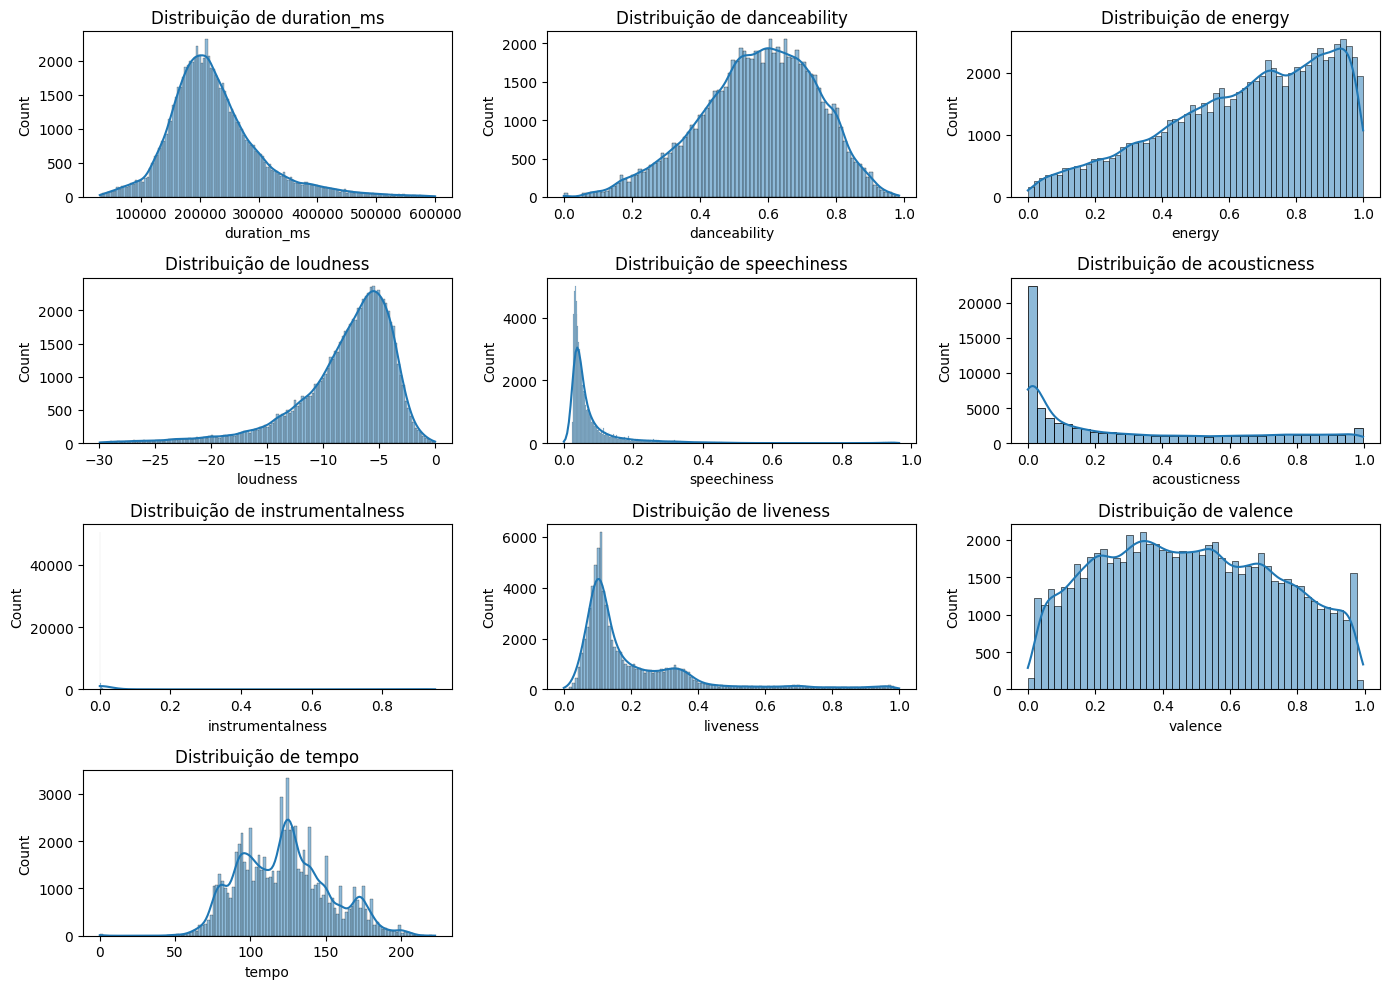

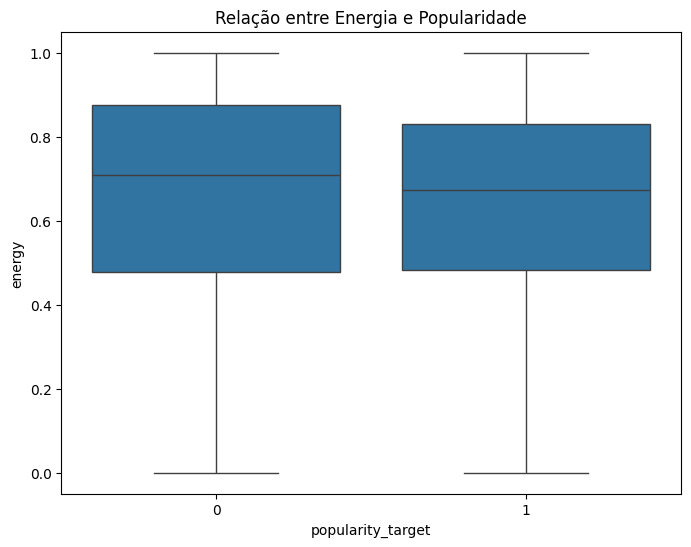

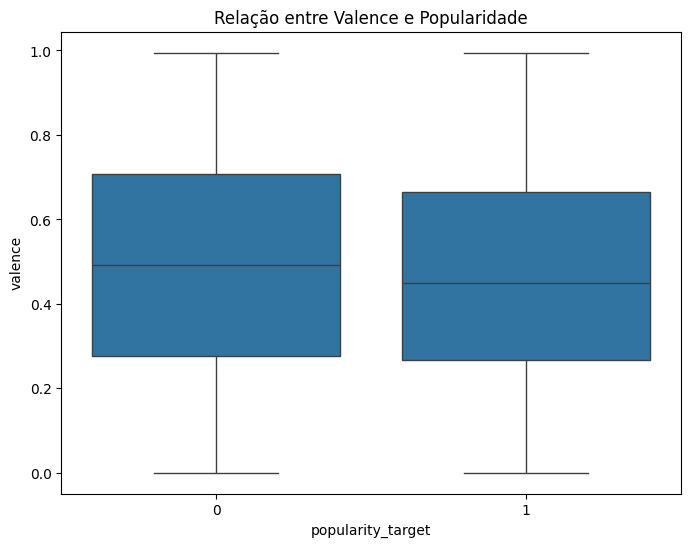

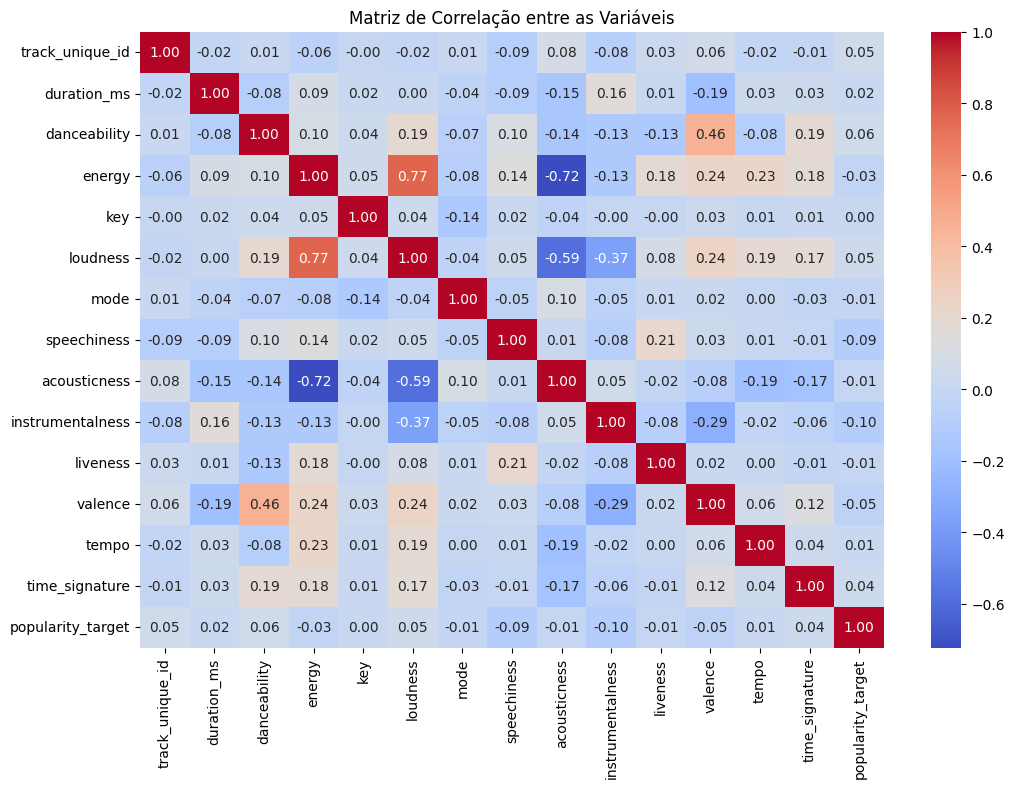

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição das principais variáveis numéricas
num_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
               'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(filtered_train_df[column], kde=True)
    plt.title(f'Distribuição de {column}')

plt.tight_layout()
plt.show()

# Relação entre energia e popularidade
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_target', y='energy', data=filtered_train_df)
plt.title('Relação entre Energia e Popularidade')
plt.show()

# Relação entre valence (positividade) e popularidade
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_target', y='valence', data=filtered_train_df)
plt.title('Relação entre Valence e Popularidade')
plt.show()

# Correlação entre variáveis
numeric_df = filtered_train_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()


### Análise Exploratória e Insights

- **Distribuição das Variáveis**: A maioria das músicas está concentrada em durações entre 2 e 5 minutos, e a energia varia significativamente, o que pode ser um fator importante.
- **Relação com Popularidade**:
  - **Energia**: Músicas com maior energia tendem a ser mais populares, como mostrado no boxplot de `energy` e `popularity_target`.
  - **Valence**: Há também uma relação entre `valence` (associado à positividade da música) e popularidade.
- **Correlação**: A matriz de correlação identifica quais variáveis podem ter maior impacto na popularidade. As variáveis `energy`, `valence`, e `danceability` mostram correlação com a variável alvo.

Com base nessa exploração, pode-se formular hipóteses e escolher as features que serão utilizadas no modelo.



---
## 3. Formulação de Hipóteses

Com base na análise exploratória realizada, pode-se formular algumas hipóteses sobre os fatores que influenciam a popularidade de uma música.

### Hipóteses:

1. **Hipótese 1**: Músicas com maior energia (`energy`) têm maior probabilidade de serem populares, já que com mais energia são frequentemente associadas a hits animados.
2. **Hipótese 2**: Músicas com altos níveis de `danceability` e `valence` (positividade) têm maior chance de serem populares, pois essas características geralmente estão ligadas ao emocional e dança.
3. **Hipótese 3**: Músicas com baixo valor de `instrumentalness` são mais populares, já que músicas instrumentais tendem a ter um apelo menor.


---
## 4. Seleção de Features
### Features Selecionadas:
- `energy`: Relacionada com a animação e intensidade da música.
- `danceability`: Quanto mais fácil é dançar ao som de uma música.
- `valence`: Medida de positividade ou felicidade transmitida pela música.
- `loudness`: Nível de volume da música.
- `tempo`: A velocidade da música, que pode influenciar o seu apelo.
- `instrumentalness`: Faixas com altos valores dessa variável tendem a ser mais instrumentais, o que pode ser menos popular.
- `duration_ms`: Duração da música, que pode ter um impacto direto na retenção de ouvintes.

### Engenharia de Features:
Para melhorar o modelo, é conveniente aplicar uma codificação de variáveis categóricas, como `track_genre`, para convertê-las em formato utilizável pelo modelo.


In [5]:

# Aplica a codificação One-Hot
filtered_train_df = pnd.get_dummies(filtered_train_df, columns=['track_genre'], drop_first=True)

# Remove colunas
columns_to_drop = ['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name']
final_train_df = filtered_train_df.drop(columns=columns_to_drop)

# Define X  e y 
X = final_train_df.drop(columns=['popularity_target'])
y = final_train_df['popularity_target']
X.columns


Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=127)


---
## 5. Construção e Avaliação do Modelo
### Modelo Escolhido:
O modelo utilizado foi o **RandomForestClassifier**, um modelo capaz de capturar interações não lineares entre as features.

Também será avaliado utilizando as métricas de **acurácia**, **precisão**, **recall**, e **F1-score**, além de realizar um ajuste fino dos hiperparâmetros para otimizar a performance.



In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialia o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Define o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configura o GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
print("Ajustando o modelo com GridSearchCV...")
grid_search.fit(X_train, y_train)

# Selecionaa o melhor modelo
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Avalia o modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Exibe os resultados
print("\n*** Resultados da Avaliação do Modelo ***")
print(f"Acurácia do modelo: {accuracy:.4f}\n")
print("Relatório de Classificação:\n")
print(classification_rep)


Ajustando o modelo com GridSearchCV...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



*** Resultados da Avaliação do Modelo ***
Acurácia do modelo: 0.8360

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8099
           1       0.83      0.83      0.83      7487

    accuracy                           0.84     15586
   macro avg       0.84      0.84      0.84     15586
weighted avg       0.84      0.84      0.84     15586




---
## 6. Previsão no Conjunto de Teste Final

Agora que o modelo foi treinado e avaliado com os dados de treino, ele pode ser utilizado para fazer previsões no conjunto de teste final (`test.csv`). 


In [11]:
# Carrega o conjunto de teste
test_data_path = "test.csv"
test_df = pnd.read_csv(test_data_path)
test_df_processed = pnd.get_dummies(test_df, columns=['track_genre'], drop_first=True)
test_df_processed = test_df_processed.drop(columns=['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name'])
missing_cols = set(X.columns) - set(test_df_processed.columns)
for col in missing_cols:
    test_df_processed[col] = 0
test_df_processed = test_df_processed[X.columns]

# Faz previsão no conjunto de teste
test_predictions = best_rf_model.predict(test_df_processed)

# Gera o arquivo de submissão
submission_df = pnd.DataFrame({
    'track_unique_id': test_df['track_unique_id'],
    'popularity_target': test_predictions
})

# Salva o arquivo CSV
submission_df.to_csv("spotify_submission.csv", index=False)
